# Предсказание индекса RTSI

In [1]:
# Импорт цен акций за указанный период
import urllib.request
import datetime
import time
import nltk
import string
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import statistics as sts
import warnings
import urllib.request
import nltk
import string
import scipy.stats as sps
from tqdm.notebook import tqdm
from sklearn import model_selection, linear_model, metrics, preprocessing
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

warnings.filterwarnings('ignore')
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Функции для скачивания данных с finam.ru

In [2]:
# Тикеры акций и их id в системе Finam
tickers={'DJ.W1IDU':20447,'DJ.W1FIN':20459,'NASDAQCOMP':82075,'EURUSD':83,'USDCNY':83225,'INDUSDX':438796,'NYMEX.NG':18949,'ICE.BRN':19473,'GDAX.BCH-USD':491809,'comex.SI':18952, 'comex.GC':18953, 'USDCB':82485, 'D&J-IND':91, 'LME.Nickel':18932,'LME.Alum':18930, 'RTSI':95,'ABRD':82460,'AESL':181867,'AFKS':19715,'AFLT':29,'AGRO':399716,'AKRN':17564,'ALBK':82616,'ALNU':81882,'ALRS':81820,'AMEZ':20702,'APTK':13855,'AQUA':35238,'ARMD':19676,'ARSA':19915,'ASSB':16452,'AVAN':82843,'AVAZ':39,'AVAZP':40,'BANE':81757,'BANEP':81758,'BGDE':175840,'BISV':35242,'BISVP':35243,'BLNG':21078,'BRZL':81901,'BSPB':20066,'CBOM':420694,'CHEP':20999,'CHGZ':81933,'CHKZ':21000,'CHMF':16136,'CHMK':21001,'CHZN':19960,'CLSB':16712,'CLSBP':16713,'CNTL':21002,'CNTLP':81575,'DASB':16825,'DGBZ':17919,'DIOD':35363,'DIXY':18564,'DVEC':19724,'DZRD':74744,'DZRDP':74745,'ELTZ':81934,'ENRU':16440,'EPLN':451471,'ERCO':81935,'FEES':20509,'FESH':20708,'FORTP':82164,'GAZA':81997,'GAZAP':81998,'GAZC':81398,'GAZP':16842,'GAZS':81399,'GAZT':82115,'GCHE':20125,'GMKN':795,'GRAZ':16610,'GRNT':449114,'GTLC':152876,'GTPR':175842,'GTSS':436120,'HALS':17698,'HIMC':81939,'HIMCP':81940,'HYDR':20266,'IDJT':388276,'IDVP':409486,'IGST':81885,'IGST03':81886,'IGSTP':81887,'IRAO':20516,'IRGZ':9,'IRKT':15547,'ISKJ':17137,'JNOS':15722,'JNOSP':15723,'KAZT':81941,'KAZTP':81942,'KBSB':19916,'KBTK':35285,'KCHE':20030,'KCHEP':20498,'KGKC':83261,'KGKCP':152350,'KLSB':16329,'KMAZ':15544,'KMEZ':22525,'KMTZ':81903,'KOGK':20710,'KRKN':81891,'KRKNP':81892,'KRKO':81905,'KRKOP':81906,'KROT':510,'KROTP':511,'KRSB':20912,'KRSBP':20913,'KRSG':15518,'KSGR':75094,'KTSB':16284,'KTSBP':16285,'KUBE':522,'KUNF':81943,'KUZB':83165,'KZMS':17359,'KZOS':81856,'KZOSP':81857,'LIFE':74584,'LKOH':8,'LNTA':385792,'LNZL':21004,'LNZLP':22094,'LPSB':16276,'LSNG':31,'LSNGP':542,'LSRG':19736,'LVHK':152517,'MAGE':74562,'MAGEP':74563,'MAGN':16782,'MERF':20947,'MFGS':30,'MFGSP':51,'MFON':152516,'MGNT':17086,'MGNZ':20892,'MGTS':12984,'MGTSP':12983,'MGVM':81829,'MISB':16330,'MISBP':16331,'MNFD':80390,'MOBB':82890,'MOEX':152798,'MORI':81944,'MOTZ':21116,'MRKC':20235,'MRKK':20412,'MRKP':20107,'MRKS':20346,'MRKU':20402,'MRKV':20286,'MRKY':20681,'MRKZ':20309,'MRSB':16359,'MSNG':6,'MSRS':16917,'MSST':152676,'MSTT':74549,'MTLR':21018,'MTLRP':80745,'MTSS':15523,'MUGS':81945,'MUGSP':81946,'MVID':19737,'NAUK':81992,'NFAZ':81287,'NKHP':450432,'NKNC':20100,'NKNCP':20101,'NKSH':81947,'NLMK':17046,'NMTP':19629,'NNSB':16615,'NNSBP':16616,'NPOF':81858,'NSVZ':81929,'NVTK':17370,'ODVA':20737,'OFCB':80728,'OGKB':18684,'OMSH':22891,'OMZZP':15844,'OPIN':20711,'OSMP':21006,'OTCP':407627,'PAZA':81896,'PHOR':81114,'PHST':19717,'PIKK':18654,'PLSM':81241,'PLZL':17123,'PMSB':16908,'PMSBP':16909,'POLY':175924,'PRFN':83121,'PRIM':17850,'PRIN':22806,'PRMB':80818,'PRTK':35247,'PSBR':152320,'QIWI':181610,'RASP':17713,'RBCM':74779,'RDRB':181755,'RGSS':181934,'RKKE':20321,'RLMN':152677,'RLMNP':388313,'RNAV':66644,'RODNP':66693,'ROLO':181316,'ROSB':16866,'ROSN':17273,'ROST':20637,'RSTI':20971,'RSTIP':20972,'RTGZ':152397,'RTKM':7,'RTKMP':15,'RTSB':16783,'RTSBP':16784,'RUAL':414279,'RUALR':74718,'RUGR':66893,'RUSI':81786,'RUSP':20712,'RZSB':16455,'SAGO':445,'SAGOP':70,'SARE':11,'SAREP':24,'SBER':3,'SBERP':23,'SELG':81360,'SELGP':82610,'SELL':21166,'SIBG':436091,'SIBN':2,'SKYC':83122,'SNGS':4,'SNGSP':13,'STSB':20087,'STSBP':20088,'SVAV':16080,'SYNG':19651,'SZPR':22401,'TAER':80593,'TANL':81914,'TANLP':81915,'TASB':16265,'TASBP':16266,'TATN':825,'TATNP':826,'TGKA':18382,'TGKB':17597,'TGKBP':18189,'TGKD':18310,'TGKDP':18391,'TGKN':18176,'TGKO':81899,'TNSE':420644,'TORS':16797,'TORSP':16798,'TRCN':74561,'TRMK':18441,'TRNFP':1012,'TTLK':18371,'TUCH':74746,'TUZA':20716,'UCSS':175781,'UKUZ':20717,'UNAC':22843,'UNKL':82493,'UPRO':18584,'URFD':75124,'URKA':19623,'URKZ':82611,'USBN':81953,'UTAR':15522,'UTII':81040,'UTSY':419504,'UWGN':414560,'VDSB':16352,'VGSB':16456,'VGSBP':16457,'VJGZ':81954,'VJGZP':81955,'VLHZ':17257,'VRAO':20958,'VRAOP':20959,'VRSB':16546,'VRSBP':16547,'VSMO':15965,'VSYD':83251,'VSYDP':83252,'VTBR':19043,'VTGK':19632,'VTRS':82886,'VZRZ':17068,'VZRZP':17067,'WTCM':19095,'WTCMP':19096,'YAKG':81917,'YKEN':81766,'YKENP':81769,'YNDX':388383,'YRSB':16342,'YRSBP':16343,'ZHIV':181674,'ZILL':81918,'ZMZN':556,'ZMZNP':603,'ZVEZ':82001,'FIVE':7,'DSKY':8,'SFIN':9,'RNFT':9}

# Акции, входящие в индекс RTSI
RTSI=['GAZP','SBER','SBERP','LKOH','GMKN','YNDX','NVTK','TATN','TATNP','ROSN','SNGS','SNGSP','MGNT','FIVE','MTSS','POLY','ALRS','CHMF','PLZL','IRAO','NLMK','VTBR','MOEX','PHOR','TRNFP','MAGN','RTKM','RUAL','AFLT','PIKK','HYDR','FEES','AFKS','LSRG','CBOM','UPRO','DSKY','LNTA','SFIN','RNFT','MVID']
#Перевод массива строк в дату
def array2date(arr):
    new_arr=list()
    for item in arr:
        if len(item)==6:
            a=int(item[0:2])
            b=int(item[2:4])
            c=2000+int(item[4:])
            new_arr.append(datetime.date(c,b,a))
        elif len(item)==8:
            a=int(item[6:])
            b=int(item[4:6])
            c=2000+int(item[2:4])
            new_arr.append(datetime.date(c,b,a))
    return new_arr
# Формируем дату и время
def dtformed(d,mn,y,h=0,m=0,s=0):
    return datetime.datetime(y,mn,d,h,m,s)


# Возвращаем ID инструмента по его имени 
def getID(name):
    return tickers[name]
def load(name, dtstart=datetime.datetime.today(), 
         dtfin=datetime.datetime.today(),step=8, 
         market=1, MSOR=1, mstimever=0, sourse='finam', moment='close'):
    # market - инструмент
    # 0 — начала свечи, 1 — окончания свечи
    # mstimever - не московское — mstimever=0; московское — mstime='on', mstimever='1'
    #  период котировок (тики, 1 мин., 5 мин., 10 мин., 15 мин., 30 мин., 1 час, 1 день, 1 неделя, 1 месяц)
    id =getID(name) # id инстурмента
    e = '.txt' # расширение получаемого файла: .txt либо .csv
    yf = str(dtstart.year)
    yt = str(dtfin.year)
    month_start = str(dtstart.month)
    day_start = str(dtstart.day)
    month_end = str(dtfin.month)
    day_end = str(dtfin.day)
    dtf = '3' # формат даты (1 — ггггммдд, 2 — ггммдд, 3 — ддммгг, 4 — дд/мм/гг, 5 — мм/дд/гг)
    tmf = '1' # формат времени (1 — ччммсс, 2 — ччмм, 3 — чч: мм: сс, 4 — чч: мм)
    sep = '5' # параметр разделитель полей (1 — запятая (,), 2 — точка (.), 3 — точка с запятой (;), 4 — табуляция (»), 5 — пробел ( ))
    sep2 = '1' # параметр разделитель разрядов (1 — нет, 2 — точка (.), 3 — запятая (,), 4 — пробел ( ), 5 — кавычка ('))
    datf = '1' # Перечень получаемых данных (1-6)
    at = '0' # добавлять заголовок в файл (0 — нет, 1 — да)

    year_start = yf[2:]
    year_end = yt[2:]
    mf = (int(month_start.replace('0', ''))) - 1
    mt = (int(month_end.replace('0', ''))) - 1
    df = (int(day_start.replace('0', ''))) - 1
    dt = (int(day_end.replace('0', ''))) - 1
    
    user_agent = 'Chrome/98.0.4758.102 Safari/537.36'
    # Запрос
    headers={'User-Agent':user_agent,} 
    
    site='http://export.finam.ru/' + str(name) + '_' + str(year_start) + str(month_start) + str(
            day_start) + '_' + str(year_end) + str(month_end) + str(day_end) + str(e) + '?market=' + str(
            market) + '&em=' + str(id) + '&code=' + str(name) + '&apply=0&df=' + str(df) + '&mf=' + str(
            mf) + '&yf=' + str(yf) + '&from=' + str(day_start) + '.' + str(month_start) + '.' + str(yf) + '&dt=' + str(
            dt) + '&mt=' + str(mt) + '&yt=' + str(yt) + '&to=' + str(day_end) + '.' + str(month_end) + '.' + str(
            yt) + '&p=' + str(step) + '&f=' + str(name) + '_' + str(year_start) + str(month_start) + str(
            day_start) + '_' + str(year_end) + str(month_end) + str(day_end) + '&e=' + str(e) + '&cn=' + str(
            name) + '&dtf=' + str(dtf) + '&tmf=' + str(tmf) + '&MSOR=' + str(MSOR) + '&mstimever=' + str(
            mstimever) + '&sep=' + str(sep) + '&sep2=' + str(sep2) + '&datf=' + str(datf) + '&at=' + str(at)
    #Пока не удалось получить данные, пробуем это сделать
    errors=0
    while ('data' not in locals()):
        try:
            request=urllib.request.Request(site, None, headers) #The assembled request
            response = urllib.request.urlopen(request) 
            data = response.read() # The data u need
            #print(data)
        except urllib.error.HTTPError as e:
            errors+=1

    # Выделение нужных данных
    
    content = str(data)
    #print(content)
    stokelist=content.split(r'\r\n')
    n=len(stokelist)
    price_str=list()
    dates_str=list()
    for k in range(n-1):
        stokelist1=stokelist[k].split(' ')
        price_str.append(stokelist1[7])
        dates_str.append(stokelist1[2])
    dates=array2date(dates_str)
    prices=list()
    for item in price_str:
        prices.append(float(item))      
    return prices,dates

# Объединяем вещественные данные по неделям

In [3]:
def num_zeros(arr):
    zeros=0
    for i in range(len(arr)):
        if arr[i]==0:
            zeros+=1
    return zeros
def the_mean(arr):
    if len(arr)-num_zeros(arr)==0:
        return 0
    else:
        return round(sum(arr)/(len(arr)-num_zeros(arr)),3)
def week_lists(arr,date1,date2):
    inf=arr[0]
    date=arr[1]
    date1=datetime.date(date1.year,date1.month,date1.day)
    date2=datetime.date(date2.year,date2.month,date2.day)
    delta=(date2-date1).days+1
    new_arr=[0 for i in range(delta)]
    for i in range(len(inf)):
        if  (date[i]-date1).days<len(new_arr):
            new_arr[(date[i]-date1).days]=inf[i]
    week_arr=[]
    week_arr.append(new_arr[0:7+(delta%7)])
    for i in range((delta//7)-1):
        week_arr.append(new_arr[7+(delta%7)+i*7:7+(delta%7)+i*7+7])
    week_data=np.zeros((len(week_arr),1),dtype=np.float64)
    for i in range(len(week_arr)):
        week_data[i,0]=the_mean(week_arr[i])
    return week_data
def filler(arr):
    for i in range(0, arr.shape[0]-1):
        if arr[i,0]!=0 and arr[i+1,0]==0:
            arr[i+1,0]=arr[i,0]
    return arr
feature_names=RTSI+['RTSI']
n_start=dtformed(3,1,2016)
n_finish=dtformed(31,12,2019)
def arr_to_mtrx(arr):
    v=arr[0]
    for i in range(1,len(arr)):
        v=np.hstack((v,arr[i]))
    return v
a=datetime.date(2016,1,1)
b=datetime.date(2019,11,30)
targets=filler(week_lists(load('RTSI',n_start,n_finish),a,b))
#Данные по акицям, дополнительным признакам, RTSI
stocks_arr=list()
for item in RTSI:
    stocks_arr.append(filler(week_lists(load(item,n_start,n_finish),a,b)))
#Объединяем массивы с данными по акциям
def arr_to_mtrx(arr):
    v=arr[0]
    for i in range(1,len(arr)):
        v=np.hstack((v,arr[i]))
    return v
stocks=arr_to_mtrx(stocks_arr)
Week_data=pd.DataFrame(np.hstack((stocks,targets)),columns=RTSI+['RTSI'])

# Загружаем датасет с текстами

In [4]:
lenta=pd.read_csv('lenta-ru-news.csv')

# Считаем число пропусков

In [5]:
lenta.isna().sum()

url          0
title        0
text         5
topic    62002
tags     27219
date         0
dtype: int64

# Фильтруем датафрейм

In [6]:
#Отбрасываем столбцы, не представляющие интерес, удаляем данные с пропусками, берем период с 2016 по 2019 год
lenta.drop(columns = ['url', 'topic'],axis = 1, inplace=True)
lenta["date"] = pd.to_datetime(lenta["date"],format="%Y/%m/%d")
lenta=lenta[lenta['date']>pd.Timestamp('2015-12-31 00:00:00')]
lenta=lenta[lenta['date']<pd.Timestamp('2019-12-01 00:00:00')]
lenta=lenta.dropna(subset=['text','tags'])
lenta.reset_index(drop=True, inplace=True)

In [7]:
lenta.head(10)

,title,text,tags,date
0,В Техасе разрешили открыто носить оружие,В американском штате Техас владельцам огнестре...,Политика,2016-01-01
1,Запрет туркам вести строительство в России вст...,"Постановление правительства, запрещающее турец...",Госэкономика,2016-01-01
2,Вертолет Bell совершил жесткую посадку в Росто...,В Аксайком районе Ростовской области совершил ...,Происшествия,2016-01-01
3,В Новом Орлеане неизвестный расстрелял посетит...,В Новом Орлеане неизвестный в ночь на 1 января...,Происшествия,2016-01-01
4,Путин подписал указ о транзите грузов из Украи...,Президент Владимир Путин подписал указ о мерах...,Политика,2016-01-01
5,Сенатор сообщил об угрозе терактов из-за отмен...,Член комитета Совфеда по международным делам И...,Политика,2016-01-01
6,Косачев назвал сближение Европы и России тренд...,Глава комитета Совета Федерации по международн...,Политика,2016-01-01
7,Подросток погиб на пожаре после запуска фейерв...,"Подросток стал жертвой пожара, произошедшего в...",Общество,2016-01-01
8,В МВД заявили об отсутствии серьезных нарушени...,Новогодняя ночь в России прошла спокойно. Така...,Общество,2016-01-01
9,В новогоднюю ночь во Франции сожгли более 800 ...,Во Франции в новогоднюю ночь в общей сложности...,Происшествия,2016-01-01


# Определяем темы новостей, выбираем интересующие

In [8]:
lenta.tags.unique()

array(['Политика', 'Госэкономика', 'Происшествия', 'Общество', 'Звери',
       'Украина', 'Кино', 'Прибалтика', 'Музыка', 'Рынки', 'Конфликты',
       'Наука', 'Деньги', 'Футбол', 'Люди', 'Преступность', 'Интернет',
       'Coцсети', 'Летние виды', 'Криминал', 'Следствие и суд',
       'Средняя Азия', 'Бизнес', 'Техника', 'Еда', 'Все', 'Мир',
       'Бокс и ММА', 'Вещи', 'Россия', 'Явления', 'Гаджеты', 'Пресса',
       'Полиция и спецслужбы', 'Мировой бизнес', 'Достижения', 'Книги',
       'Стиль', 'Деловой климат', 'ТВ и радио', 'Космос', 'Инструменты',
       'Молдавия', 'Зимние виды', 'Закавказье', 'Регионы', 'Квартира',
       'События', 'Движение', 'Офис', 'Часы', 'Город', 'Игры', 'Москва',
       'Искусство', 'Мнения', 'Финансы компаний', 'Дача', 'Белоруссия',
       'Софт', 'Театр', 'История', 'Реклама', 'Вкусы', 'Внешний вид',
       'Страноведение', 'Автобизнес', 'Аналитика рынка', 'Производители',
       'Туризм', 'Госрегулирование', 'Выборы', 'Экология', 'Оружие',
       'Ме

In [9]:
sets=['Госэкономика','Рынки','Экономика','Мировой бизнес','Бизнес','Деловой климат']
sets1=['Госэкономика','Рынки','Экономика','Мировой бизнес','Бизнес','Деловой климат','Финансы компаний','Мир','Госрегулирование']
lenta1=lenta[lenta['tags'].isin(sets1)]
lenta1.reset_index(drop=True,inplace=True)

# Разделяем датасет на недели

In [10]:
date_len=(datetime.datetime(2019,11,30)-datetime.datetime(2016,1,1)).days+1
weeks=list()
weeks.append(lenta.date.unique()[0:7+date_len%7])
for i in range((date_len//7)-1):
    weeks.append(lenta.date.unique()[7+date_len%7+i*7:7+date_len%7+i*7+7])
week_sets=list()
for i in range(len(weeks)):
    week_sets.append(lenta1[lenta1['date'].isin(weeks[i])])
for i in range(len(week_sets)):
    week_sets[i].reset_index(drop=True,inplace=True)

# Объединяем тексты и заголовки в массивы

In [11]:
def union(arr,column):
    a=str()
    for i in range(len(arr[column])):
        a+=arr[column][i]
        a+='\t'
    return a
week_titles=pd.DataFrame(columns=['date','title'])
for i in range(len(week_sets)):
    new_row={'date':week_sets[i]['date'][0],'title':union(week_sets[i],'title')}
    week_titles=week_titles.append(new_row,ignore_index=True)

Нормализация численных данных

In [12]:
scaler=preprocessing.StandardScaler()
Norm_df = pd.DataFrame(np.hstack((scaler.fit_transform(Week_data.iloc[:,:-1]),(Week_data.iloc[:,-1]).to_numpy().reshape((-1,1)))),columns=Week_data.columns)

# Просмотр наборов данных, их статистик

In [13]:
week_titles

,date,title
0,2016-01-01,Запрет туркам вести строительство в России вст...
1,2016-01-10,Завод Nissan в Петербурге сократит 250 сотрудн...
2,2016-01-17,Иран заявил о намерении купить 114 самолетов A...
3,2016-01-24,В России нашелся инвестор для реализации проек...
4,2016-01-31,Владимир Путин списал долг Монголии\tПодрядчик...
...,...,...
199,2019-10-27,Сбербанк запустил приложение SberFood для похо...
200,2019-11-03,Песков заявил о возможности реализации «Северн...
201,2019-11-10,Пьяный пассажир самолета потрогал попутчицу на...
202,2019-11-17,Во Франции рассказали о «дедолларизации» Росси...


In [14]:
week_titles=week_titles[:50]

In [15]:
Norm_df=Norm_df[:50]

In [16]:
Norm_df.head(5)

,GAZP,SBER,SBERP,LKOH,GMKN,YNDX,NVTK,TATN,TATNP,ROSN,...,AFKS,LSRG,CBOM,UPRO,DSKY,LNTA,SFIN,RNFT,MVID,RTSI
0,-0.551786,-2.036850,-1.789882,-1.396443,-0.912634,-1.548931,-1.145312,-1.237417,-1.070500,-2.055907,...,0.724802,-0.608353,-1.271597,2.998781,-1.396443,1.501545,-2.577921,-2.577921,-2.137167,746.267
1,-0.706797,-2.196955,-1.885372,-1.539689,-1.140575,-1.790851,-1.180487,-1.310503,-1.127231,-2.314956,...,0.683240,-1.032736,-1.422755,2.894710,-1.539689,1.366952,-2.724252,-2.724252,-2.523296,686.814
2,-0.797634,-2.290135,-1.957728,-1.545550,-1.020642,-1.827678,-1.159415,-1.320335,-1.157575,-2.323933,...,0.615997,-1.565859,-1.502779,2.540868,-1.545550,1.308986,-2.805505,-2.805505,-2.543482,651.824
3,-0.591593,-2.119770,-1.913150,-1.332164,-0.933967,-1.733393,-1.005387,-1.186945,-1.149460,-1.857682,...,0.680496,-1.435374,-1.486478,2.547806,-1.332164,1.031145,-2.666321,-2.666321,-2.581915,708.384
4,-0.621136,-2.079738,-1.880972,-1.236155,-0.962942,-1.722151,-0.930560,-1.140734,-1.150165,-1.622632,...,0.660303,-1.528578,-1.459803,0.764719,-1.236155,1.039141,-2.557232,-2.557232,-2.351321,718.658


In [17]:
Norm_df.describe()

,GAZP,SBER,SBERP,LKOH,GMKN,YNDX,NVTK,TATN,TATNP,ROSN,...,AFKS,LSRG,CBOM,UPRO,DSKY,LNTA,SFIN,RNFT,MVID,RTSI
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,-0.353574,-1.315680,-1.367343,-0.988840,-0.784493,-1.264045,-0.837635,-1.110596,-1.146185,-0.757522,...,1.137424,-0.017551,-1.099514,0.482617,-0.988840,1.221999,-0.214991,-0.214991,-1.480411,908.728460
std,0.235990,0.489096,0.359951,0.241296,0.248104,0.349058,0.176490,0.138698,0.079251,0.613592,...,0.364702,1.134242,0.275058,1.142275,0.241296,0.342547,1.384859,1.384859,0.812076,106.204088
min,-0.797634,-2.290135,-1.957728,-1.545550,-1.176857,-1.827678,-1.180487,-1.320335,-1.284480,-2.323933,...,0.576985,-1.750868,-1.502779,-1.795433,-1.545550,0.685344,-2.805505,-2.805505,-2.791293,651.824000
25%,-0.533497,-1.779303,-1.677891,-1.128213,-0.961844,-1.658189,-0.957080,-1.189062,-1.209972,-1.000659,...,0.765236,-1.140619,-1.309016,-0.354046,-1.128213,0.902095,-0.781325,-0.781325,-2.348021,863.799500
50%,-0.411344,-1.226107,-1.394676,-1.013696,-0.808585,-1.227362,-0.834660,-1.160125,-1.158560,-0.626192,...,1.183741,0.218519,-1.184163,0.560046,-1.013696,1.231530,0.192583,0.192583,-1.616933,927.007000
75%,-0.224537,-0.896984,-1.016416,-0.768053,-0.643792,-0.984005,-0.760648,-1.027199,-1.081802,-0.359265,...,1.416004,1.041505,-0.817754,1.279872,-0.768053,1.541102,0.571576,0.571576,-0.755990,981.359750
max,0.254669,-0.276372,-0.572021,-0.484462,-0.090317,-0.761646,-0.287174,-0.654586,-0.892826,0.651648,...,1.774422,1.668297,-0.569159,2.998781,-0.484462,1.737739,2.466165,2.466165,-0.036062,1147.058000


# График RTSI

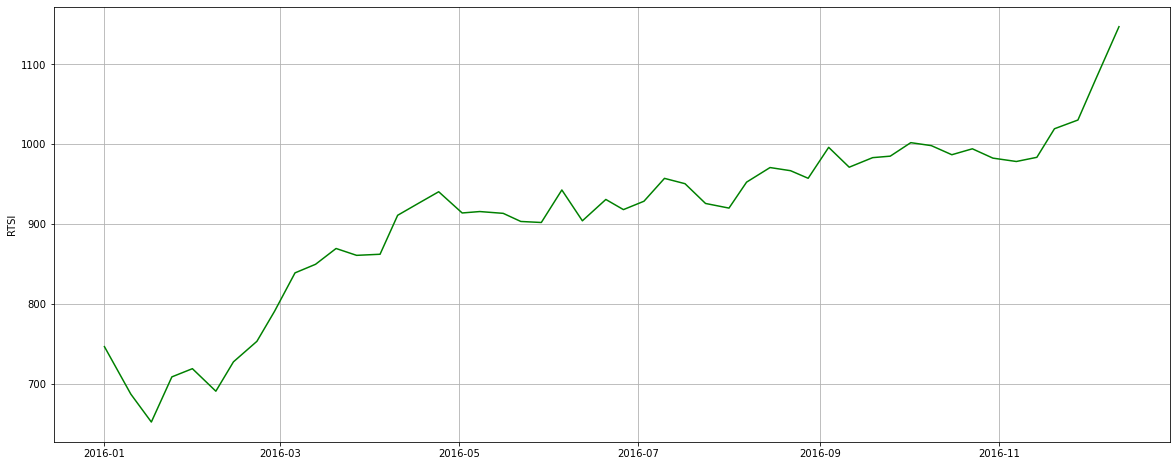

In [18]:
targets=Norm_df['RTSI'].to_list()
x=np.linspace(0,len(targets),len(targets))
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(week_titles['date'],targets,color='green')
ax.grid()
ax.set_ylabel('RTSI')
plt.show()

# Выбираем размер тестовой выборки

In [19]:
test_size=5

# Rolling

In [20]:
rolling_data = Norm_df.copy()
rolling_data.insert(0,'time',np.arange(1,len(rolling_data)+1))
cols=list(rolling_data.columns)[1:]
index_cols=['time']
shift_range = [1, 2, 3]
for month_shift in tqdm(shift_range):
    train_shift = rolling_data[index_cols + cols].copy()
    
    train_shift['time'] = train_shift['time'] + month_shift
    
    new_columns = lambda x: '{}_lag_{}'.format(x, month_shift) if x in cols else x
    train_shift = train_shift.rename(columns=new_columns )

    rolling_data = pd.merge(rolling_data, train_shift, on=index_cols, how='left').fillna(0)

In [21]:
RTSI=rolling_data['RTSI']
rolling_data_=rolling_data.drop(['RTSI'],axis=1)
Norm_df_=Norm_df.drop(['RTSI'],axis=1)

# Подготовка

Кросс-валидация

In [22]:
tscv_1=TimeSeriesSplit(n_splits=5,test_size=1)

Сетки параметров

In [23]:
#LightGBM
lgbm_params = {
    'n_estimators' : [300,500,1000,2000],
    'reg_lambda' : [1,2,3,4],
    'num_leaves': [15,20,25,30,35]
}
#Lasso
lasso_params = {
    'max_iter' : np.arange(3,25),
    'alpha' : np.linspace(0.0001,3,30),
}

# Модели

In [24]:
the_lasso=linear_model.Lasso(random_state=7)
lgbm_model=lgb.LGBMRegressor(random_state=7,verbosity=-1,n_jobs=-1)

In [25]:
def Graph_result(predicted,real):
    ind=np.linspace(1,len(predicted),len(predicted))
    fig, axs = plt.subplots(figsize=(8, 4))
    axs.plot(ind, predicted,color='red',label='Прогноз')
    axs.plot(ind, real,color='navy',label='Истинные значения')
    axs.grid()
    axs.set_xlabel('T')
    axs.set_ylabel('RTSI')
    axs.legend()
    plt.show()

In [26]:
#Разделение на обучающую и тестовую выборку для бустингов
def model_train_test(df,targets):
    y_cv, y_test =targets.iloc[:-1], targets.iloc[-1:].to_numpy()
    x_cv, x_test =df.iloc[:-1], df.iloc[-1:]
    return x_cv, x_test, y_cv, y_test
#Находим лучшие гиперпараметры
def estimator_selection(df,targets, tscv, params, model):
    x_cv, x_test, y_cv, y_test = model_train_test(df,targets)
    grid_cv=model_selection.GridSearchCV(model, params,scoring='neg_mean_absolute_error',cv=tscv,n_jobs=-1)
    grid_cv.fit(x_cv,y_cv) 
    return grid_cv.best_estimator_


In [27]:
models=list()

In [28]:
%%time
models.append(estimator_selection(rolling_data_[:50-test_size],RTSI[:50-test_size],tscv_1,lgbm_params,lgbm_model))

Wall time: 16 s


In [29]:
%%time
models.append(estimator_selection(Norm_df_[:50-test_size],RTSI[:50-test_size],tscv_1,lgbm_params,lgbm_model))

Wall time: 9.04 s


In [30]:
%%time
models.append(estimator_selection(rolling_data_[:50-test_size],RTSI[:50-test_size],tscv_1,lasso_params,the_lasso))

Wall time: 13.7 s


In [31]:
%%time
models.append(estimator_selection(Norm_df_[:50-test_size],RTSI[:50-test_size],tscv_1,lasso_params,the_lasso))

Wall time: 11 s


In [32]:
models

[LGBMRegressor(n_estimators=300, num_leaves=15, random_state=7, reg_lambda=2,
               verbosity=-1),
 LGBMRegressor(n_estimators=500, num_leaves=15, random_state=7, reg_lambda=3,
               verbosity=-1),
 Lasso(alpha=1.4483275862068965, max_iter=24, random_state=7),
 Lasso(alpha=2.172441379310345, max_iter=3, random_state=7)]

In [33]:
model_data=[Norm_df_,rolling_data_,Norm_df_,rolling_data_]

# Делаем прогноз на несколько недель

In [34]:
inds=[41+42*i for i in range(1,len(shift_range)+1)]

In [35]:
#Номера столбцов с лагами RTSI
inds

[83, 125, 167]

In [36]:
#Функция замены значений в массиве
def replacing(np_,arr,inds):
    arr=arr[-len(shift_range):]
    for i in range(len(inds)):
        np_[inds[i]]=arr[-(i+1)]
    return np_
    

In [37]:
def model_prediction(df,targets,test_size,model,visual=True,subsequence=True):
    if subsequence==True:
        x_train, x_test=df[:-test_size], df[-test_size:]
        y_train, y_test=targets[:-test_size], targets[-test_size:]
        results=list(targets[:-test_size].to_numpy())[-len(shift_range):]
        x_test.reset_index(drop=True, inplace=True)
        for i in range(len(x_test)):
            #Заменяем в первой строке тестовой выборке значения RTSI_lag_ , чтобы они соответствовали предыдущим прогнозам
            x_series=pd.Series(replacing(np.array(x_test.loc[i]),results,inds),index=df.columns)
            #Обучаем модель
            model.fit(x_train,y_train.to_list())
            #Предсказываем результат
            prediction=model.predict([x_test.loc[i]])
            results.append(prediction[0])
            #Добавляем первую строку тестовой выборке в обучающую
            #Добавляем прогноз в число меток обучающей выборки
            y_train.loc[len(y_train)]=prediction
            x_train.loc[len(x_train)]=x_series
        final_results=list(results[-test_size:])    
        if visual:
            print('R2-score',metrics.r2_score(list(y_test),final_results))
            Graph_result(final_results,list(y_test))
        return final_results, list(y_test), metrics.r2_score(list(y_test),final_results)
    if subsequence==False:
        x_train, x_test=df[:-test_size], df[-test_size:]
        y_train, y_test=targets[:-test_size], targets[-test_size:]
        model.fit(x_train,y_train.to_list())
        prediction=model.predict(x_test)
        r2_result=metrics.r2_score(prediction,y_test)  
        if visual:
            print('R2-score',r2_result)
            Graph_result(prediction,list(y_test))
        return prediction, list(y_test), metrics.r2_score(prediction,list(y_test))
        
        
        
    

R2-score -2.1460213488667734


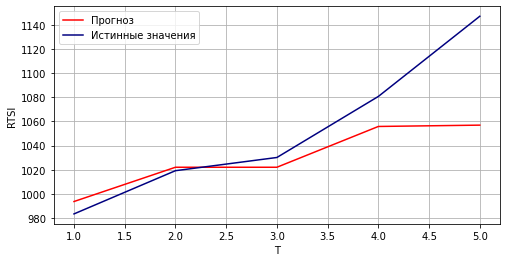

In [38]:
x_tr1=model_prediction(Norm_df_,RTSI,5,models[0],subsequence=False)

R2-score -1.6578438291567226


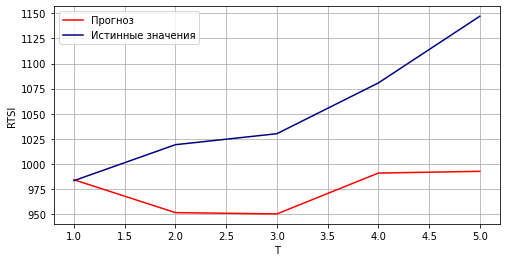

In [39]:
x_tr2=model_prediction(rolling_data_,RTSI,5,models[1])

R2-score 0.7073503315958121


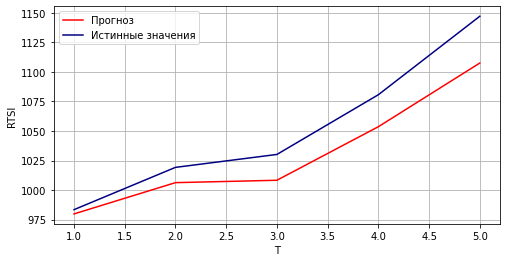

In [40]:
x_tr3=model_prediction(Norm_df_,RTSI,5,models[2],subsequence=False)

R2-score 0.6925445622008672


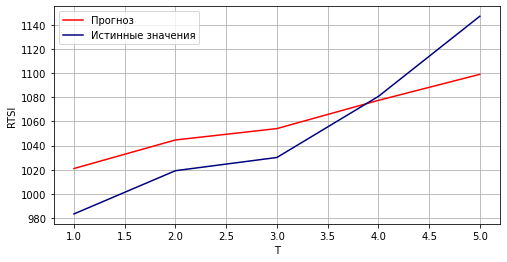

In [41]:
x_tr4=model_prediction(rolling_data_,RTSI,5,models[3])

# Обработка текста

Разделяем текст на слова, отбрасываем "стоп-слова", удаляем суффиксы, приставки и прочее, исключаем слова с длиной 1 и 2

In [42]:
def the_tokenize(text):
    tokens=word_tokenize(text,language='russian')
    tokens_not_punkt=[i for i in tokens if i not in string.punctuation]
    tokens_not_punkt_or_stop=[i for i in tokens_not_punkt if i not in stopwords.words('russian')]
    long_words=[i for i in tokens_not_punkt_or_stop if len(i)>2]
    not_digit_words=[i for i in long_words if i.isalpha()]
    snowball=SnowballStemmer(language='russian')
    stemmed_tokens=[snowball.stem(i) for i in not_digit_words]
    return stemmed_tokens

# TF-IDF

In [43]:
v=TfidfVectorizer(tokenizer=lambda x: the_tokenize(x),ngram_range=(1,2),min_df=20, max_df=0.5)
text_features=v.fit_transform(week_titles['title'])
text_features.toarray()
print('Количество текстовых признаков',text_features.shape[1])
title_f_names=list()
def numpy_transform(sparse_arr):
    a=np.zeros((sparse_arr.shape[0],sparse_arr.shape[1]),dtype=np.float64)
    for i in range(sparse_arr.shape[0]):
        for j in range(sparse_arr.shape[1]):
            a[i,j]=sparse_arr[i,j]
    return a

Количество текстовых признаков 101


In [44]:
numpy_text=numpy_transform(text_features)

# Понижаем размерность

Используем метод главных компонент, создаем датасеты, где данные сжаты до 2,3,5...,50 признаков, чтобы впоследствие оценить лучший результат

In [45]:
def text_ftr_name(length):
    names_arr=list()
    for i in range(length):
        names_arr.append('text_feat_'+str(i))
    return names_arr
def PCA_text_data(text,max_features):
    text_dfs=list()
    for i in range(len(max_features)):
        pca = PCA(n_components = max_features[i])
        reduced_ftr= pca.fit_transform(text)
        title_f_names=text_ftr_name(reduced_ftr.shape[1])
        text_dfs.append(pd.DataFrame(reduced_ftr,columns=title_f_names))
    return text_dfs
nums_features=[2,3,4,5,7,10,15,20,30,50]
text_dfs=PCA_text_data(numpy_text,nums_features)

Оцениваем модели на разных данных

In [46]:
lasso_model_df1=pd.DataFrame(columns=['dataset','R2'])
lgbm_model_df1=pd.DataFrame(columns=['dataset','R2'])
lasso_model_df2=pd.DataFrame(columns=['dataset','R2'])
lgbm_model_df2=pd.DataFrame(columns=['dataset','R2'])

In [47]:
#Проверяем прогнозы для разных моделей и датасетов (образованных слиянием вещественных и текстовых признаков)
def model_cv_checker(dataset,num_dataset):
    global lasso_model_df1
    global lgbm_model_df1
    global lasso_model_df2
    global lgbm_model_df2
    prediction_=model_prediction(pd.concat([model_data[0],dataset],axis=1),RTSI,5,models[0],visual=False,subsequence=False)
    new_row1={'dataset':num_dataset,'R2':prediction_[2]}
    lgbm_model_df1=lgbm_model_df1.append(new_row1,ignore_index=True)
    prediction_=model_prediction(pd.concat([model_data[1],dataset],axis=1),RTSI,5,models[1],visual=False)
    new_row2={'dataset':num_dataset,'R2':prediction_[2]}
    lgbm_model_df2=lgbm_model_df2.append(new_row2,ignore_index=True)
    prediction_=model_prediction(pd.concat([model_data[2],dataset],axis=1),RTSI,5,models[2],visual=False,subsequence=False)
    new_row3={'dataset':num_dataset,'R2':prediction_[2]}
    lasso_model_df1=lasso_model_df1.append(new_row3,ignore_index=True)
    prediction_=model_prediction(pd.concat([model_data[3],dataset],axis=1),RTSI,5,models[3],visual=False)
    new_row4={'dataset':num_dataset,'R2':prediction_[2]}
    lasso_model_df2=lasso_model_df2.append(new_row4,ignore_index=True)


    

In [48]:
for i in range(len(text_dfs)):
    model_cv_checker(text_dfs[i],i+1)

In [49]:
lasso_model_df1['PCA_num']=nums_features
lgbm_model_df1['PCA_num']=nums_features
lasso_model_df2['PCA_num']=nums_features
lgbm_model_df2['PCA_num']=nums_features

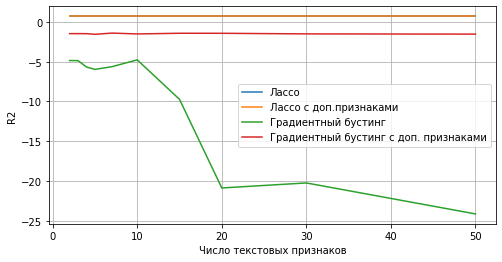

In [50]:
result_list=[lasso_model_df1,lasso_model_df2,lgbm_model_df1,lgbm_model_df2]
label_list=["Лассо","Лассо с доп.признаками","Градиентный бустинг","Градиентный бустинг с доп. признаками"]
fig, axs = plt.subplots(figsize=(8, 4))
axs.grid()
for i in range(len(result_list)):
    axs.plot(result_list[i]['PCA_num'], result_list[i]['R2'],label=label_list[i])  
    axs.set_xlabel('Число текстовых признаков')
    axs.set_ylabel('R2')
    axs.legend()
plt.show()

In [51]:
lasso_model_df1_=lasso_model_df1.sort_values(by=['R2'],ascending=False)

In [52]:
lasso_model_df2_=lasso_model_df2.sort_values(by=['R2'],ascending=False)

In [53]:
lgbm_model_df1_= lgbm_model_df1.sort_values(by=['R2'],ascending=False)

In [54]:
lgbm_model_df2_ = lgbm_model_df2.sort_values(by=['R2'],ascending=False)

Вывод моделей с лучшим качеством R2-score

In [55]:
lasso_model_df1_.head(1)

,dataset,R2,PCA_num
0,1.0,0.70735,2


In [56]:
lasso_model_df2_.head(1)

,dataset,R2,PCA_num
0,1.0,0.692545,2


In [57]:
lgbm_model_df1_.head(1)

,dataset,R2,PCA_num
5,6.0,-4.771807,10


In [58]:
lgbm_model_df2_.head(1)

,dataset,R2,PCA_num
4,5.0,-1.408486,7


# Выводы: 

Регрессия Лассо хорошо подходит для предсказания индекса RTSI, Коэффициент детерминации выше 0.5.
Градиентный бустинг не показывает хороших результатов на выбранной выборке, 
даже при добавлении предыдущих значений в качестве признаков. 
Текстовые признаки не сильно влияют не качество моделей. Оценка на регрессии Лассо не меняется. 
Градиентный бустинг с доп. признаками показывает несколько лучший, но всё еще неудовлетворительный
результат при добавлении текстовых данных.
При использовании градиентного бустинга без дополнительных данных, R2 уменьшается по мере увеличения числа текстовых признаков.
